In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.basics import *
from fastai.vision import *
import librosa
import librosa.display

In [3]:
import os
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
path = Path('C:/Users/Andrew/.fastai/data')

# Converting our Sound Data to Spectrograms

In [13]:
audio_fpath = path/'spoken_digits/0'
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  150


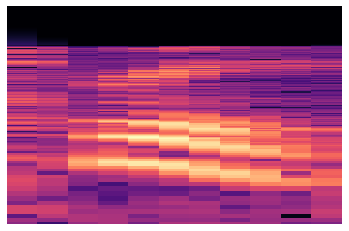

In [58]:
i = 0
for file in os.listdir(path/'spoken_digits/3'):
    plt.axis('off')
    y, sr = librosa.load(path/'spoken_digits/3'/file)
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
    plt.savefig(path/'spectrograms/3'/str(i))
    i = i + 1

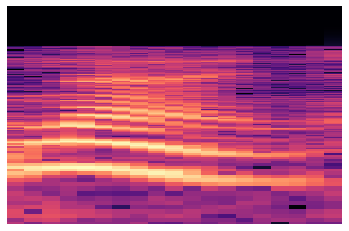

In [59]:
for j in [4, 5, 6, 7, 8, 9]:
    i = 0
    for file in os.listdir(path/'spoken_digits'/str(j)):
        plt.axis('off')
        y, sr = librosa.load(path/'spoken_digits'/str(j)/file)
        D = np.abs(librosa.stft(y))
        librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
        plt.savefig(path/'spectrograms'/str(j)/str(i))
        i = i + 1

In [45]:
i = 0
for file in os.listdir(path/'spoken_digits/0'):
    print(file)
    

0_jackson_0.wav
0_jackson_1.wav
0_jackson_2.wav
0_jackson_3.wav
0_jackson_4.wav
0_jackson_5.wav
0_jackson_6.wav
0_jackson_7.wav
0_jackson_8.wav


In [40]:
y, sr = librosa.load(path/'spoken_digits/0/0_jackson_0.wav')

In [42]:
D = np.abs(librosa.stft(y))
D

array([[6.198602e-02, 2.665897e-02, 9.541407e-04, 5.558421e-03, ..., 2.001678e-02, 2.248749e-02, 2.310934e-02,
        1.137326e-01],
       [5.435749e-02, 3.006775e-02, 5.015680e-03, 2.993766e-03, ..., 2.203310e-02, 2.907120e-03, 1.429388e-02,
        9.636167e-02],
       [6.047194e-02, 3.260674e-02, 1.021416e-02, 7.290850e-03, ..., 1.297495e-02, 4.385340e-03, 1.332237e-02,
        1.160985e-01],
       [3.524712e-02, 2.117279e-02, 8.780886e-03, 6.908518e-03, ..., 9.739267e-03, 1.345531e-02, 1.978812e-02,
        1.636763e-01],
       ...,
       [1.663987e-03, 8.320498e-04, 4.055900e-07, 2.179498e-07, ..., 1.044865e-07, 1.605974e-07, 9.583954e-05,
        1.377265e-03],
       [1.663784e-03, 8.317204e-04, 2.221456e-07, 3.863954e-07, ..., 1.490046e-07, 1.511781e-07, 9.592615e-05,
        1.377199e-03],
       [1.663965e-03, 8.320786e-04, 1.848782e-07, 5.314969e-07, ..., 4.368680e-07, 2.276575e-07, 9.577742e-05,
        1.377153e-03],
       [1.664127e-03, 8.320488e-04, 2.034517e-07, 

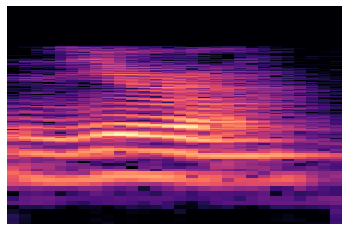

In [43]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.axis('off')
plt.savefig(path/'spectrograms'/str(i))

# Now for the Deep Learning

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.basics import *
from fastai.vision import *

path = Path('C:/Users/Andrew/.fastai/data')

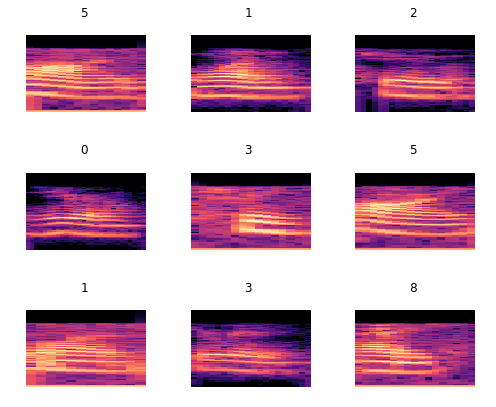

In [4]:
data = ImageDataBunch.from_folder(path/'spectrograms', valid_pct=0.2, bs = 32).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.979178,1.584728,0.533333,01:05
1,1.859379,0.846991,0.270000,01:05
2,1.165844,0.764491,0.263333,01:06
3,0.729690,0.552206,0.180000,01:05
4,0.475064,0.503716,0.153333,01:06
5,0.310843,0.471725,0.150000,01:04
6,0.211516,0.523215,0.170000,01:06
7,0.149902,0.464629,0.143333,01:06
8,0.112594,0.459774,0.133333,01:06
9,0.087110,0.455665,0.146667,01:05


In [7]:
learn.unfreeze()

In [8]:
learn.fit_one_cycle(13)

epoch,train_loss,valid_loss,error_rate,time
0,0.154231,0.507009,0.153333,01:10
1,0.269608,1.113121,0.306667,01:17
2,0.353752,1.677732,0.290000,02:17
3,0.269433,0.192543,0.056667,02:17
4,0.173454,0.124636,0.030000,02:16
5,0.116911,0.186228,0.046667,02:16
6,0.081626,0.068980,0.020000,02:10
7,0.062674,0.114533,0.020000,01:07
8,0.037375,0.073744,0.013333,01:08
9,0.023280,0.040652,0.010000,01:09


In [9]:
learn.save('Speech Digit Recognizer')